# Quickstart
In this tutorial, we explain how to quickly use ``LEGWORK`` to calculate the detectability of a collection of sources.

In [1]:
%matplotlib inline

Let's start by importing the source and visualisation modules of `LEGWORK` and some other common packages.

In [2]:
import legwork.source as source
import legwork.visualisation as vis

import numpy as np
import astropy.units as u
import matplotlib.pyplot as plt

In [3]:
%config InlineBackend.figure_format = 'retina'

plt.rc('font', family='serif')
plt.rcParams['text.usetex'] = False
fs = 24

# update various fontsizes to match
params = {'figure.figsize': (12, 8),
          'legend.fontsize': fs,
          'axes.labelsize': fs,
          'xtick.labelsize': 0.7 * fs,
          'ytick.labelsize': 0.7 * fs}
plt.rcParams.update(params)

Next let's create a random collection of possible LISA sources in order to assess their detectability.

In [4]:
# create a random collection of sources
n_values = 1500
m_1 = np.random.uniform(0, 10, n_values) * u.Msun
m_2 = np.random.uniform(0, 10, n_values) * u.Msun
dist = np.random.normal(8, 1.5, n_values) * u.kpc
f_orb = 10**(-5 * np.random.power(3, n_values)) * u.Hz
ecc = 1 - np.random.power(5, n_values)

We can instantiate a `Source` class using these random sources in order to analyse the population. We set `interpolate_g=True` and `interpolate_sc=True` so that the Source class uses an interpolated version of the $g(n,e)$ function from Peters 1963 and the sensitivity curve since this gives significant increases in speed. `sc_params` gives the parameters to use for the sensitivity curve and we by default use LISA with a 4 year mission.

In [5]:
# the second row of parameters are the default values but we include them here for transparency
sources = source.Source(m_1=m_1, m_2=m_2, ecc=ecc, dist=dist, f_orb=f_orb,
                        interpolate_g=True, interpolate_sc=True, sc_params={"instrument": "LISA",
                                                                            "t_obs": 4 * u.yr,
                                                                            "L": 2.5e9 * u.m,
                                                                            "approximate_R": False,
                                                                            "include_confusion_noise": True})

This `Source` class has many methods for calculating strains, visualising populations and more. You can learn more about these in the [Using the Source Class](Source.ipynb) tutorial. For now, we shall focus only on the calculation of the signal-to-noise ratio.

Therefore, let's calculate the SNR for these sources assuming a 4 year mission. We set `verbose=True` to give an impression of what sort of sources we have created. This function will split the sources based on whether they are stationary/evolving and circular/eccentric and use one of 4 SNR functions for each subpopulation.

In [6]:
snr = sources.get_snr(t_obs=4 * u.yr, verbose=True)

Calculating SNR for 1500 sources
	0 sources have already merged
	1373 sources are stationary
		381 sources are stationary and circular
		992 sources are stationary and eccentric
	127 sources are evolving
		36 sources are evolving and circular
		91 sources are evolving and eccentric


These SNR values are now stored in `sources.snr` and we can mask those that don't meet some detectable threshold.

In [7]:
detectable_threshold = 7
detectable_sources = sources.snr > 7
print("{} of the {} sources are detectable".format(len(sources.snr[detectable_sources]), n_values))

617 of the 1500 sources are detectable


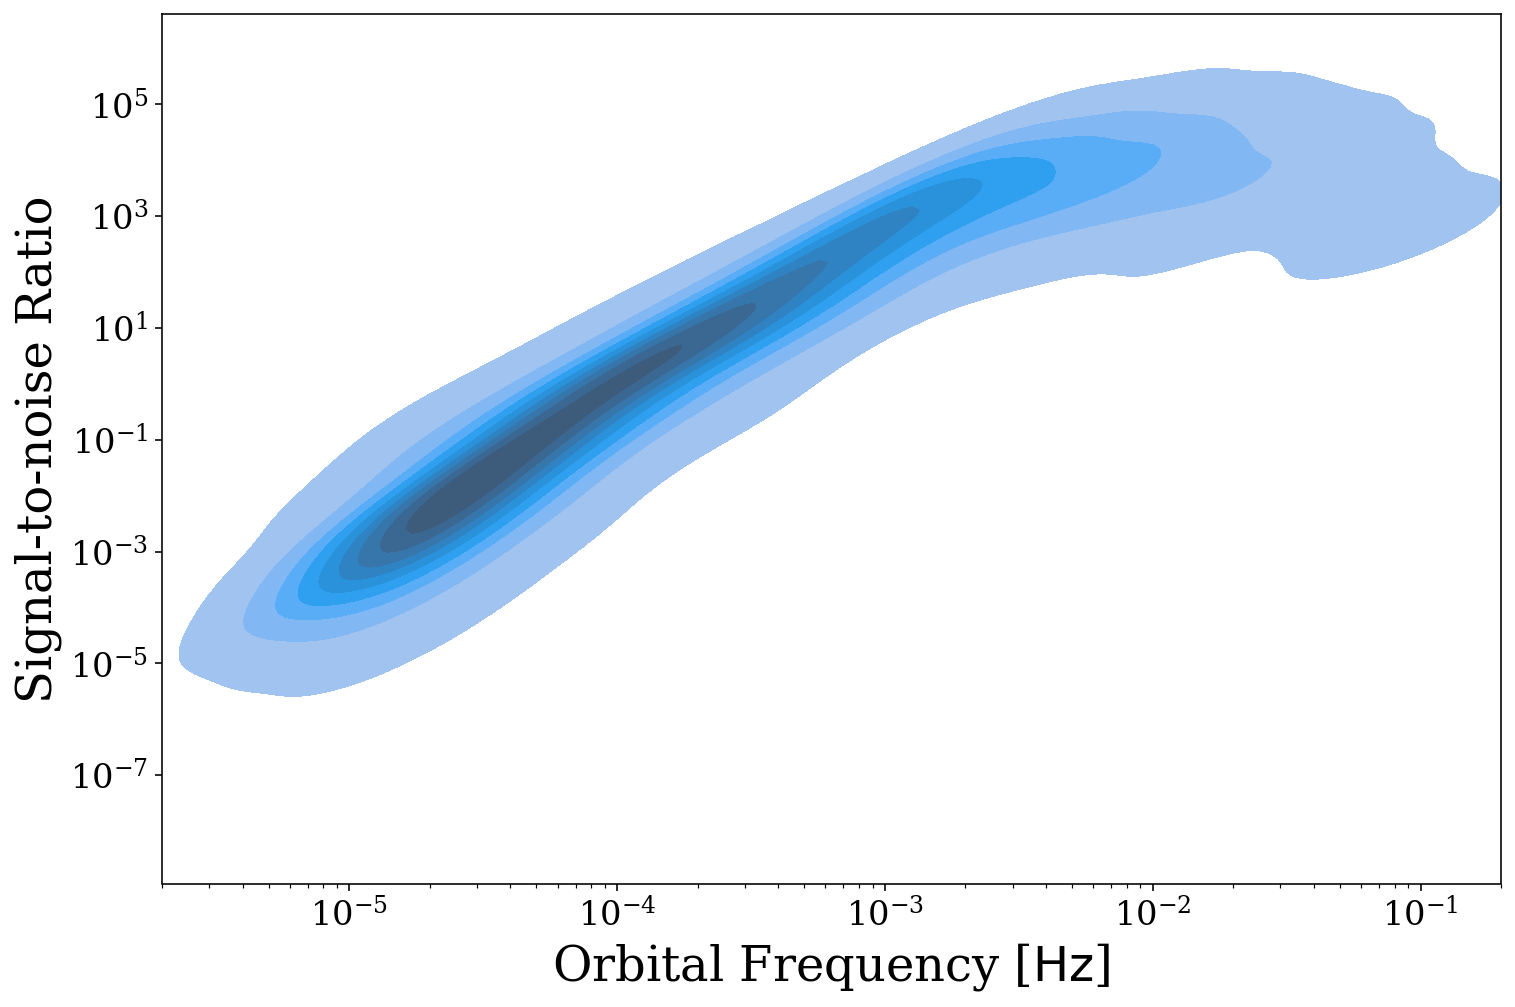

In [8]:
fig, ax = sources.plot_source_variables(xstr="f_orb", ystr="snr", disttype="kde", log_scale=(True, True),
                                        fill=True, xlim=(2e-6, 2e-1), which_sources=sources.snr > 0)

The reason for this shape may not be immediately obvious. However, if we also use the visualisation module to overlay the LISA sensitivity curve, it becomes clear that the SNRs increase in step with the decrease in the noise and flatten out as the sensitivity curve does as we would expect. To learn more about the visualisation options that `LEGWORK` offers, check out the [Visualisation](Visualisation.ipynb) tutorial.

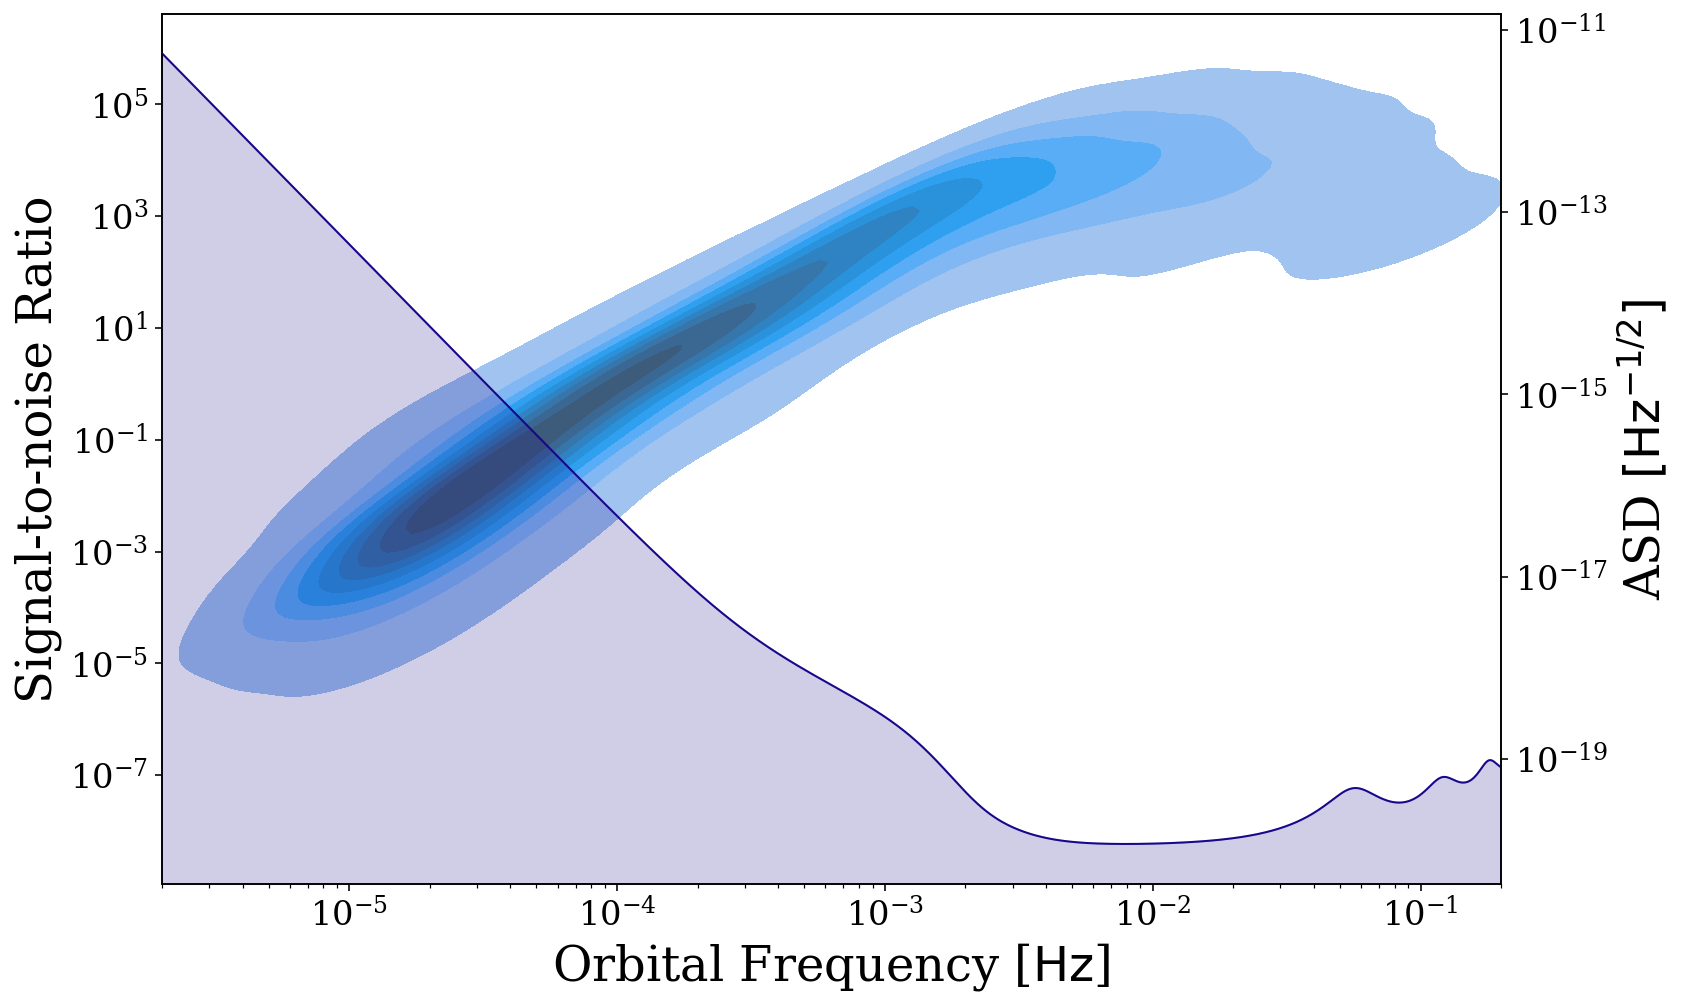

In [9]:
# create the same plot but set `show=False`
fig, ax = sources.plot_source_variables(xstr="f_orb", ystr="snr", disttype="kde", log_scale=(True, True),
                                        fill=True, show=False, which_sources=sources.snr > 0)

# duplicate the x axis and plot the LISA sensitivity curve
right_ax = ax.twinx()
frequency_range = np.logspace(np.log10(2e-6), np.log10(2e-1), 1000) * u.Hz
vis.plot_sensitivity_curve(frequency_range=frequency_range, fig=fig, ax=right_ax)

plt.show()

That's it for this quickstart into using `LEGWORK`. For more details on using `LEGWORK` to calculate strains, evolve binaries and visualise their distributions check out the other tutorials and examples in these docs!